
# Tomagraphie électrique : Résistivité apparente et inversion

Profils de résistivité apparente et inversion

Notebook issu de l'[exemple de PyGimli](https://www.pygimli.org/_examples_auto/3_ert/plot_02_ert_field_data.html)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import pygimli as pg
from pygimli.physics import ert
from pygimli.viewer.mpl import draw1DColumn, drawMesh
from pygimli.frameworks.resolution import resolutionMatrix
import pygimli.meshtools as mt

In [2]:
# définir cette méthode pour choisir quelles données sélectionner (pour lancer tout le notebook d'un coup)
# Méthodes individuelles
method = 'WS' # Wenner-Schlumberger
#method = 'WE' # Wenner
#method = 'DD' # Dipôle-dipôle
# Méthodes combinées
#method = 'WC' # Wenner-Schlumberger et Wenner combinées
#method = 'all' # Les 3 méthodes combinées

In [3]:
# format text res2dinv .dat issu de Prosys après pré-traitement et ajout de la topographie
dataWS = pg.physics.ert.load("data/clean/WS.dat")
dataWE = pg.physics.ert.load("data/clean/WE.dat")
dataDD = pg.physics.ert.load("data/clean/DD.dat")

08/12/24 - 20:08:07 - pyGIMLi - INFO - could not read unified data format for ERT ... try res2dinv
08/12/24 - 20:08:08 - pyGIMLi - INFO - could not read unified data format for ERT ... try res2dinv
08/12/24 - 20:08:08 - pyGIMLi - INFO - could not read unified data format for ERT ... try res2dinv


In [4]:
if method == 'WS':
    data = dataWS
elif method == 'WE':
    data = dataWE
elif method == 'DD':
    data = dataDD
elif method == 'WC':
    dataWS.add(dataWE)
    data = dataWS
elif method == 'all':
    dataWS.add(dataWE)
    dataWS.add(dataDD)
    data = dataWS
else:
    print(f'Bad method : {method}')

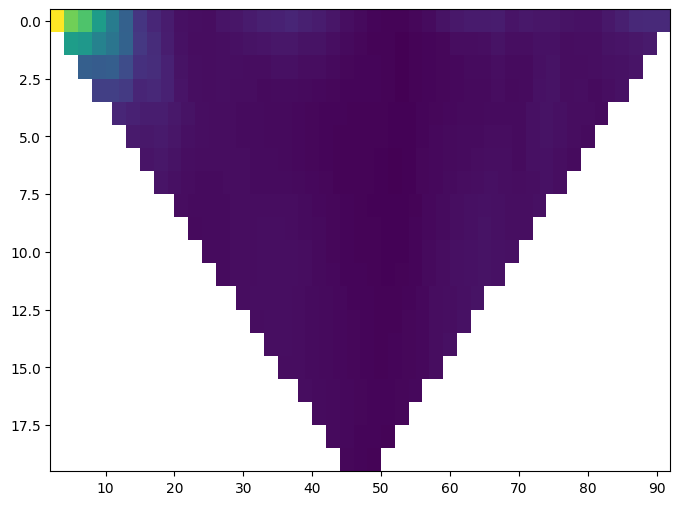

/home/valentin/micromamba/envs/gimli/lib/python3.11/site-packages/pygimli/viewer/mpl/colorbar.py:321: UserWarning: Adding colorbar to a different Figure <Figure size 800x600 with 2 Axes> than <Figure size 640x480 with 0 Axes> which fig.colorbar is called on.
  cbar = cbarTarget.colorbar(gci, cax=cax, orientation=orientation)


<Figure size 640x480 with 0 Axes>

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax, cb = ert.show(data, ax=ax, label=r'Résistivité apparente [$ \Omega m$]', cMap='Spectral_r')
ax.set_xlabel('X [m]')
ax.set_ylabel('Mesure')
fig.savefig(f'figures/elec_profil_flat_{method}')

In [6]:
# ajouter la topo, elle est dans le fichier mais disjointe des données
topo = data.additionalPoints()
elec = pg.meshtools.tapeMeasureToCoordinates(topo, pg.x(data))
data.setSensorPositions(elec)

08/12/24 - 20:08:09 - pyGIMLi - WARNING - Deprecated code usage at:
08/12/24 - 20:08:09 - pyGIMLi - WARNING - None.<module>(2661096086.py:3)
tapeMeasureToCoordinates interpolateAlongCurve


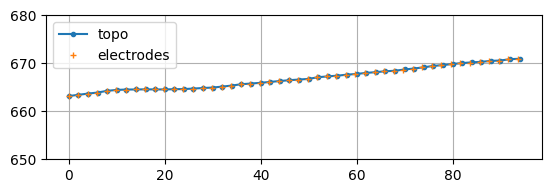

In [7]:
plt.plot(pg.x(topo), pg.y(topo), ".-", label="topo")
plt.plot(pg.x(elec), pg.y(elec), "+", markersize=4, label="electrodes")
plt.grid()
ax = plt.gca()
ax.set_aspect('equal', adjustable='box')
plt.ylim(650, 680)
plt.legend()

In [8]:
data['k'] = ert.createGeometricFactors(data, numerical=True) # ajout du champ du facteur géométrique k

08/12/24 - 20:08:10 - pyGIMLi - INFO - Cache /home/valentin/micromamba/envs/gimli/lib/python3.11/site-packages/pygimli/physics/ert/ert.py:createGeometricFactors restored (6.9s x 16): /home/valentin/.cache/pygimli/16348979266381719658


In [9]:
mgr = ert.ERTManager(sr=False) # pour l'inversion

08/12/24 - 20:08:10 - pyGIMLi - INFO - Cache /home/valentin/micromamba/envs/gimli/lib/python3.11/site-packages/pygimli/physics/ert/ert.py:createGeometricFactors restored (0.0s x 17): /home/valentin/.cache/pygimli/17299103939250436861


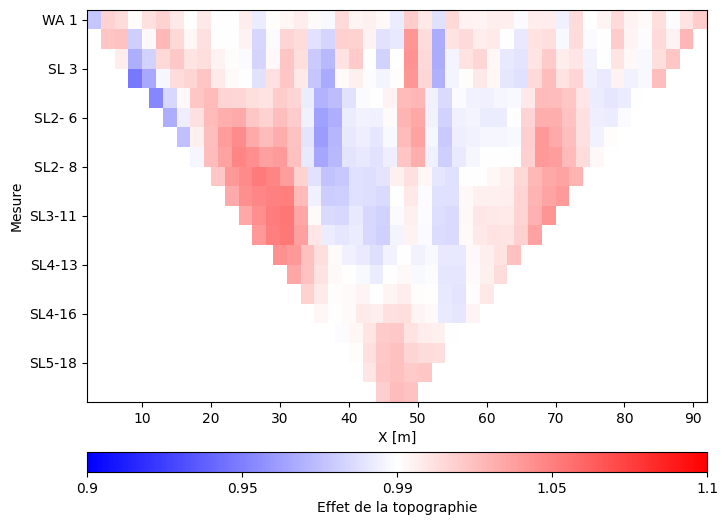

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
k0 = ert.createGeometricFactors(data)
ert.showData(data, ax=ax, vals=k0/data['k'], label='Effet de la topographie', cMap="bwr", cMin=0.9, cMax=1.1, logScale=True) # cMin = 0.98, cMax = 1.02, 
ax.set_xlabel('X [m]')
ax.set_ylabel('Mesure')

# Les points <1 font référence à une atténuation des courants dû à la topo. Les points >1 font référence à une amplification des signaux.
# D'après notre graph, pas d'effet majeur de la topo.
fig.savefig(f'figures/elec_topo_effect_{method}')

In [11]:
mgr.checkData(data)
print(data)

Data: Sensors: 48 data: 480, nonzero entries: ['a', 'b', 'k', 'm', 'n', 'rhoa', 'valid']


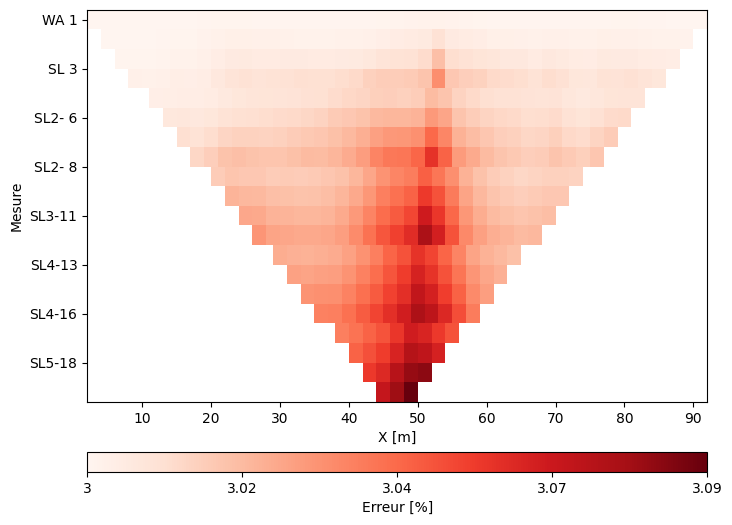

In [12]:
data['err'] = ert.estimateError(data, relativeError=0.03, absoluteUError=5e-5)  
# or manually:
# data['err'] = data_errors  # somehow
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ert.show(data, data['err']*100, ax=ax, label="Erreur [%]", cMap='Reds')
ax.set_xlabel('X [m]')
ax.set_ylabel('Mesure')
fig.savefig(f'figures/elec_error_{method}')

08/12/24 - 20:08:13 - pyGIMLi - INFO - Found 2 regions.
08/12/24 - 20:08:13 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
08/12/24 - 20:08:13 - pyGIMLi - INFO - Found 2 regions.
08/12/24 - 20:08:13 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
08/12/24 - 20:08:13 - pyGIMLi - INFO - Creating forward mesh from region infos.
08/12/24 - 20:08:13 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
08/12/24 - 20:08:14 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 4203 Cells: 8016 Boundaries: 6206
08/12/24 - 20:08:17 - pyGIMLi - INFO - Use median(data values)=623.015
08/12/24 - 20:08:17 - pyGIMLi - INFO - Created startmodel from forward operator: 1269, min/max=623.015000/623.015000
08/12/24 - 20:08:17 - pyGIMLi - INFO - Starting inversion.


Constructing Delaunay triangulation by divide-and-conquer method.
Delaunay milliseconds:  0
Recovering segments in Delaunay triangulation.
Segment milliseconds:  0
Removing unwanted triangles.
Spreading regional attributes and area constraints.
Hole milliseconds:  0
Adding Steiner points to enforce quality.
Quality milliseconds:  2

Writing vertices.
Writing triangles.
Writing segments.
Writing edges.

Output milliseconds:  0
Total running milliseconds:  14

Statistics:

  Input vertices: 150
  Input segments: 151
  Input holes: 0

  Mesh vertices: 1100
  Mesh triangles: 2004
  Mesh edges: 3103
  Mesh exterior boundary edges: 194
  Mesh interior boundary edges: 47
  Mesh subsegments (constrained edges): 241

min/max(dweight) = 32.3843/33.3328
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x7f3ca8b52340>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x7f3ca8b0e2f0>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x7f3ca8b52430>
min/max (data): 

(<Axes: xlabel='$x$ in m', ylabel='Depth in m'>,
 <matplotlib.colorbar.Colorbar at 0x7f3ca8950ad0>)

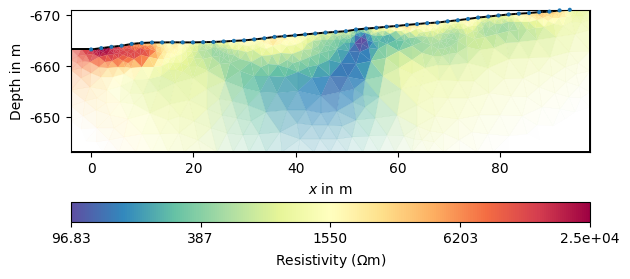

In [13]:
mod = mgr.invert(data, verbose=True, lam=10, paraDX=0.3, paraMaxCellSize=10, paraDepth=20, quality=33.6)  #lam représente la régularisation model=mod, 

mgr.showResult(xlabel="x (m)", ylabel = "z(m)")

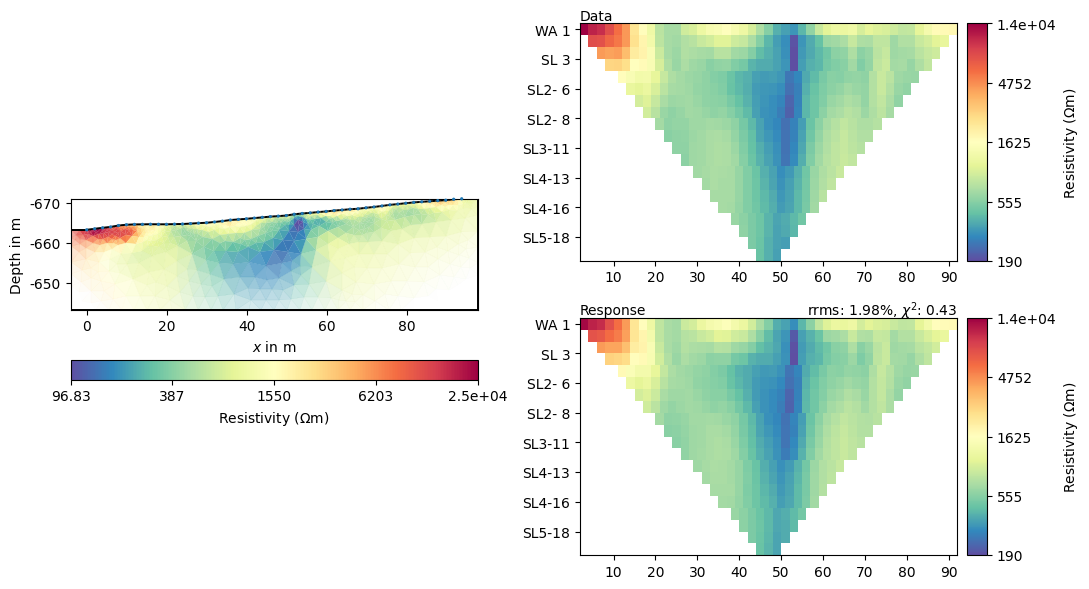

In [14]:
fig = mgr.showResultAndFit()

08/12/24 - 20:26:58 - pyGIMLi - INFO - Use median(data values)=623.015
08/12/24 - 20:26:58 - pyGIMLi - INFO - Created startmodel from forward operator: 1269, min/max=623.015000/623.015000


0 0




08/12/24 - 20:27:31 - pyGIMLi - INFO - Use median(data values)=623.015
08/12/24 - 20:27:31 - pyGIMLi - INFO - Created startmodel from forward operator: 1269, min/max=623.015000/623.015000


0 1




08/12/24 - 20:28:16 - pyGIMLi - INFO - Use median(data values)=623.015
08/12/24 - 20:28:16 - pyGIMLi - INFO - Created startmodel from forward operator: 1269, min/max=623.015000/623.015000


0 2




08/12/24 - 20:28:55 - pyGIMLi - INFO - Use median(data values)=623.015
08/12/24 - 20:28:55 - pyGIMLi - INFO - Created startmodel from forward operator: 1269, min/max=623.015000/623.015000


0 3




08/12/24 - 20:29:34 - pyGIMLi - INFO - Use median(data values)=623.015
08/12/24 - 20:29:34 - pyGIMLi - INFO - Created startmodel from forward operator: 1269, min/max=623.015000/623.015000


1 0




08/12/24 - 20:30:03 - pyGIMLi - INFO - Use median(data values)=623.015
08/12/24 - 20:30:03 - pyGIMLi - INFO - Created startmodel from forward operator: 1269, min/max=623.015000/623.015000


1 1




08/12/24 - 20:30:32 - pyGIMLi - INFO - Use median(data values)=623.015
08/12/24 - 20:30:32 - pyGIMLi - INFO - Created startmodel from forward operator: 1269, min/max=623.015000/623.015000


1 2




08/12/24 - 20:31:02 - pyGIMLi - INFO - Use median(data values)=623.015
08/12/24 - 20:31:02 - pyGIMLi - INFO - Created startmodel from forward operator: 1269, min/max=623.015000/623.015000


1 3




08/12/24 - 20:31:31 - pyGIMLi - INFO - Use median(data values)=623.015
08/12/24 - 20:31:31 - pyGIMLi - INFO - Created startmodel from forward operator: 1269, min/max=623.015000/623.015000


2 0




08/12/24 - 20:32:00 - pyGIMLi - INFO - Use median(data values)=623.015
08/12/24 - 20:32:00 - pyGIMLi - INFO - Created startmodel from forward operator: 1269, min/max=623.015000/623.015000


2 1




08/12/24 - 20:32:53 - pyGIMLi - INFO - Use median(data values)=623.015
08/12/24 - 20:32:53 - pyGIMLi - INFO - Created startmodel from forward operator: 1269, min/max=623.015000/623.015000


2 2




08/12/24 - 20:33:31 - pyGIMLi - INFO - Use median(data values)=623.015
08/12/24 - 20:33:31 - pyGIMLi - INFO - Created startmodel from forward operator: 1269, min/max=623.015000/623.015000


2 3


08/12/24 - 20:34:14 - pyGIMLi - INFO - Use median(data values)=623.015
08/12/24 - 20:34:14 - pyGIMLi - INFO - Created startmodel from forward operator: 1269, min/max=623.015000/623.015000


3 0




08/12/24 - 20:34:45 - pyGIMLi - INFO - Use median(data values)=623.015
08/12/24 - 20:34:45 - pyGIMLi - INFO - Created startmodel from forward operator: 1269, min/max=623.015000/623.015000


3 1




08/12/24 - 20:35:26 - pyGIMLi - INFO - Use median(data values)=623.015
08/12/24 - 20:35:26 - pyGIMLi - INFO - Created startmodel from forward operator: 1269, min/max=623.015000/623.015000


3 2




08/12/24 - 20:36:15 - pyGIMLi - INFO - Use median(data values)=623.015
08/12/24 - 20:36:15 - pyGIMLi - INFO - Created startmodel from forward operator: 1269, min/max=623.015000/623.015000


3 3


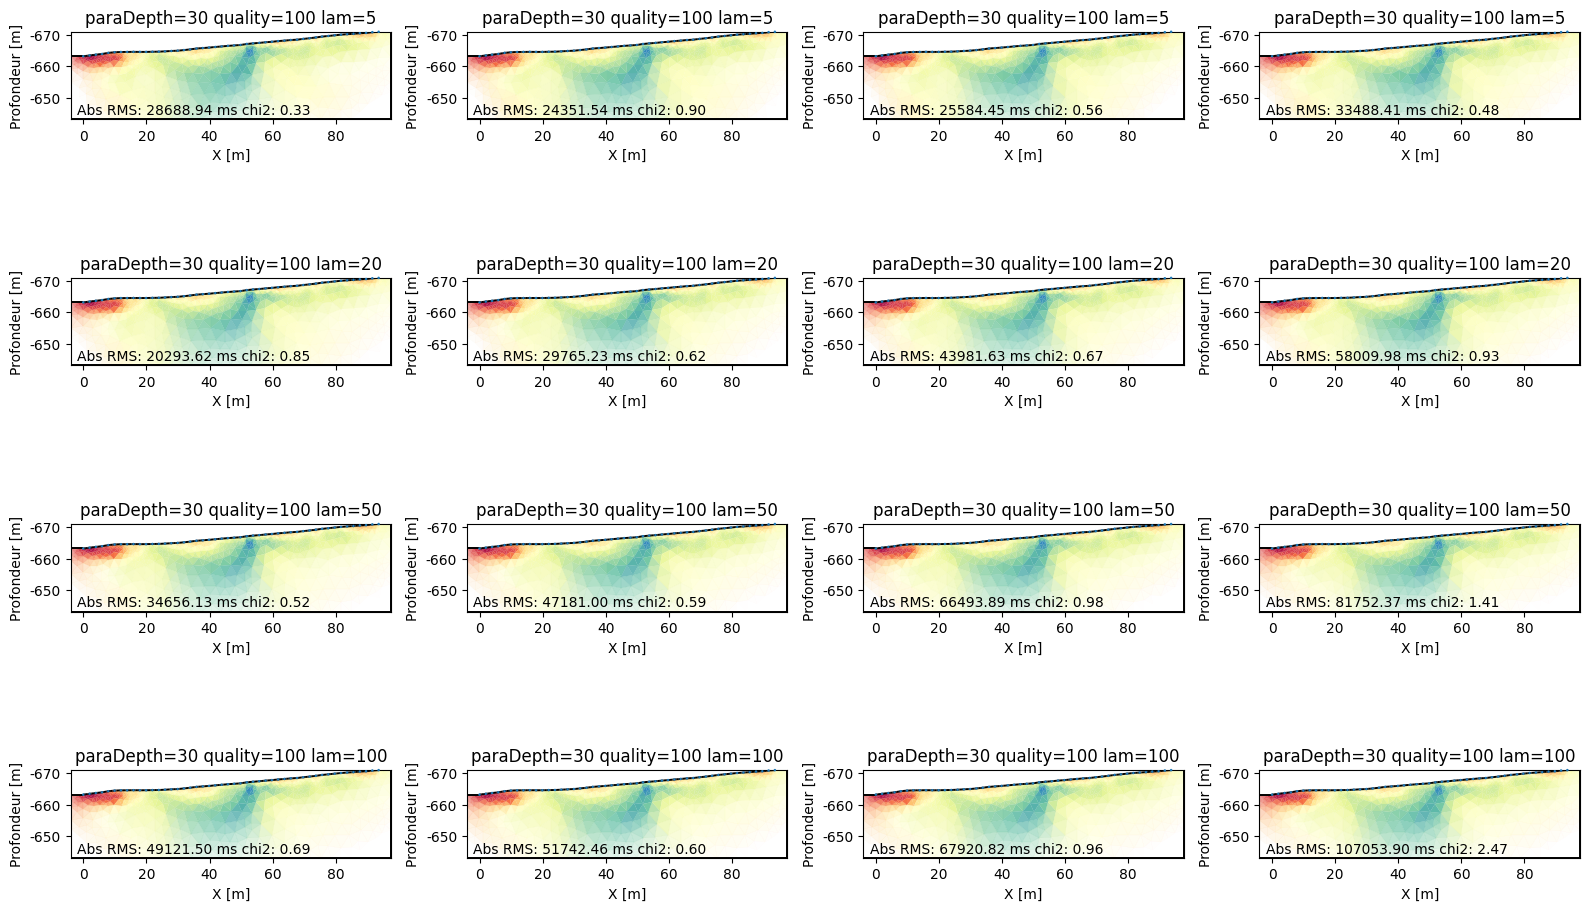

In [19]:
fig, axs = plt.subplots(4, 4, figsize=(16, 14))

abs_rmss = np.zeros((4, 4))
chi2s = np.zeros((4, 4))
lam = 10

for i, lam in enumerate([5, 20, 50, 100]):
    for j, lambdaFactor in enumerate([.25, .5, .75, 1]):
        print(i, j)
        
        mgr.invert(data, verbose=False, lam=lam, paraDX=.5, paraMaxCellSize=10, 
                   paraDepth=20, quality=33.4, lambdaFactor=lambdaFactor, dPhi = 2)
        abs_rmss[i, j] = mgr.inv.absrms()
        chi2s[i, j] = mgr.inv.chi2()

        ax = axs[i, j]
        
        ax, cb = mgr.showResult(mod, cMap="Spectral_r", 
                                logScale=True, ax=ax, cMin=50, cMax=25000, label=r'Résistivité [$ \Omega m$]') # cMin=130, cMax=23000, coverage=mgr.standardizedCoverage()
        
        ax.text(0.02, 0.02, f'Abs RMS: {mgr.inv.absrms()*1000:.2f} ms chi2: {mgr.inv.chi2():.2f}', transform=ax.transAxes, fontsize=10, verticalalignment='bottom')
        ax.set_xlabel("Х [m]")
        ax.set_ylabel("Profondeur [m]")
        ax.set_title(f'paraDepth={paraDepth} quality={quality} lam={lam}')
        cb.remove()

plt.tight_layout()

Text(0, 0.5, 'Paramètre 2')

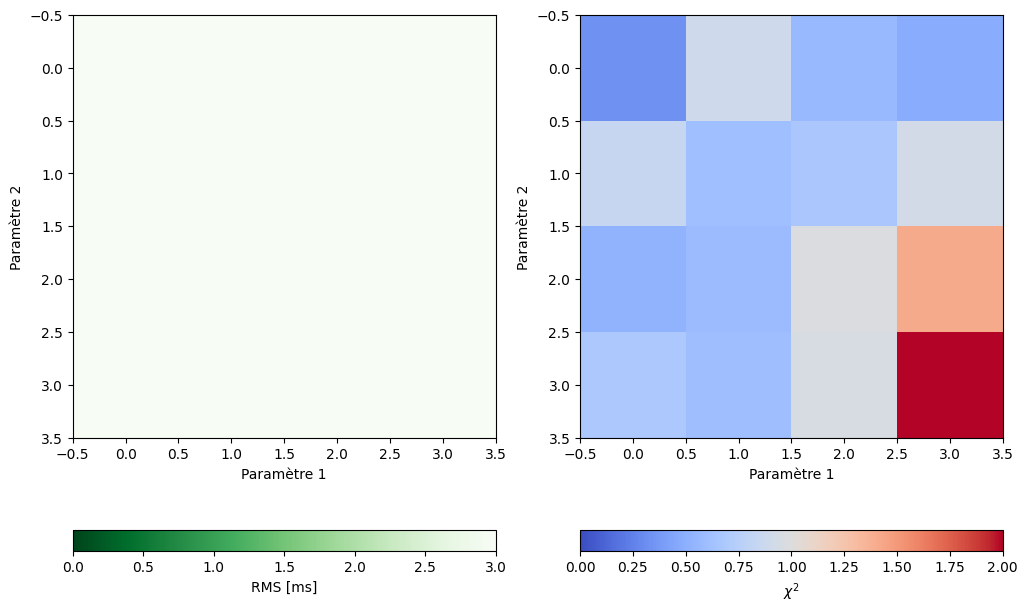

In [20]:
fig, axs = plt.subplots(1, 2, figsize=(12, 8))

px = 'Paramètre 1'
py = 'Paramètre 2'
ax = axs[0]
im = ax.imshow(abs_rmss*1000, cmap='Greens_r', vmin=0, vmax=3)
fig.colorbar(im, orientation='horizontal', label='RMS [ms]')
ax.set_xlabel(px)
ax.set_ylabel(py)

ax = axs[1]
im = ax.imshow(chi2s, cmap='coolwarm', vmin=0, vmax=2)
fig.colorbar(im, orientation='horizontal', label=r'$ \chi ^2 $')
ax.set_xlabel(px)
ax.set_ylabel(py)

In [21]:
mgr.invert(data, verbose=True, lam=10, paraDX=.5, paraMaxCellSize=10, paraDepth=20, quality=33.4)  #lam représente la régularisation model=mod,

08/12/24 - 20:37:01 - pyGIMLi - INFO - Use median(data values)=623.015
08/12/24 - 20:37:01 - pyGIMLi - INFO - Created startmodel from forward operator: 1269, min/max=623.015000/623.015000
08/12/24 - 20:37:01 - pyGIMLi - INFO - Starting inversion.


min/max(dweight) = 32.3843/33.3328
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x7f3ca8b52340>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x7f3ca8b0e2f0>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x7f3ca8b52430>
min/max (data): 190/1.4e+04
min/max (error): 3%/3.09%
min/max (start model): 623/623
--------------------------------------------------------------------------------
Calculating response for model: min = 623.015 max = 623.015
Forward: time: 1.64257s
Response: min = 616.213 max = 627.894 mean = 623.75
Reciprocity rms(modelReciprocity) 0%, max: 0%
min/max(dweight) = 32.3843/33.3328
 found valid constraints matrix. omit rebuild
constraint matrix of size(nBounds x nModel) 1807 x 1269
Calculating Jacobian matrix (forced=1)...Using existing subpotentials for createJacobian.
S(4/4-std::mt): 0.00199423:time: 6.60021s
sens sum: median = 0.955659 min = 0.490739 max = 1.00758
inv.iter 0 ... chi² =  395.10
------------------------------

1269 [2672.6315141954383,...,1337.5424446532522]

In [22]:
vel = mgr.paraModel()
t_data = data['rhoa'].array()
t_model = mgr.inv.response.array()
misfit = t_data - t_model
absrms = np.sqrt(np.mean(misfit**2)) # mgr.inv.absrms()
relrms = np.sqrt(np.sum(misfit**2)/np.sum(t_data**2))*100 # relative rms, close to mgr.inv.relrms() TODO what is the exact formula of relrms
trans = mgr.inv.dataTrans.trans # trans = np.log
trans_error = mgr.inv.dataTrans.error
dData = (trans(t_data) - trans(t_model)) / trans_error(t_data, data['err'])
phi = pg.math.dot(dData, dData) # mgr.inv.phiData() sum of squared error-weighted misfit
chi2 = phi/len(t_data) # mgr.inv.chi2() mean of squared error-weighted misfit

In [23]:
inv = mgr.createInversionFramework()
RM, RD = resolutionMatrix(inv, returnRD=True)

(<Axes: >, <matplotlib.colorbar.Colorbar at 0x7f3c6f208c50>)

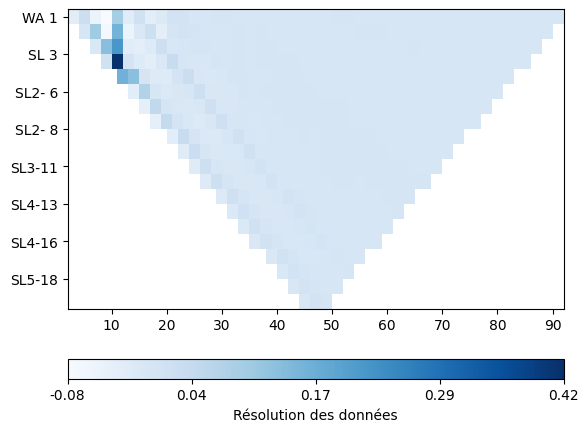

In [24]:
ert.show(data, RD[:, 23], label='Résolution des données', cMap='Blues')

(<Axes: xlabel='$x$ in m', ylabel='Depth in m'>,
 <matplotlib.colorbar.Colorbar at 0x7f3c6ecae550>)

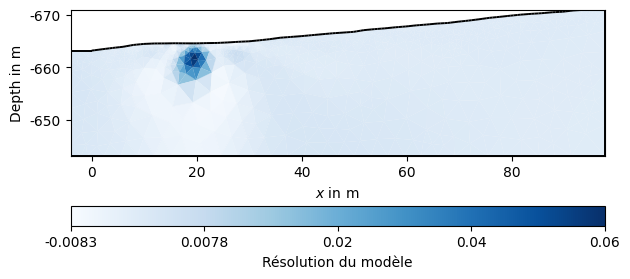

In [25]:
pg.show(mgr.paraDomain, RM[:, 600], label='Résolution du modèle', cMap='Blues')

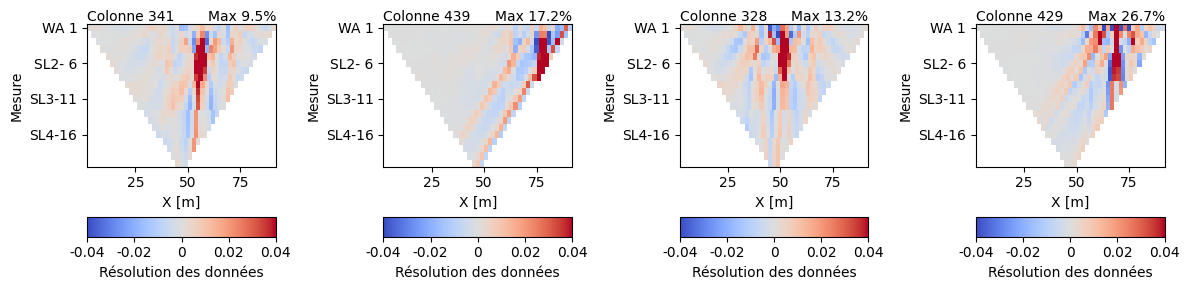

In [28]:
fig, axs = plt.subplots(1, 4, figsize=(12, 3))

#ii = [87, 323, 590, 818]
ii = np.random.randint(0, RD.shape[0], 4)
for k, i in enumerate(ii):
    ax = axs[k]
    ert.show(data, RD[:, i], ax=ax, title='i', label='Résolution des données', cMin=-.04, cMax=.04, cMap='coolwarm') # cMin=0, cMax=np.max(RD[:, i])
    ax.text(0, 1, f'Colonne {i}',
            horizontalalignment='left',
            verticalalignment='bottom',
            transform=ax.transAxes)
    ax.text(1, 1, f'Max {np.max(RD[:, i])*100:.1f}%',
            horizontalalignment='right',
            verticalalignment='bottom',
            transform=ax.transAxes)
    ax.set_xlabel('X [m]')
    ax.set_ylabel('Mesure')
plt.tight_layout()
fig.savefig(f'figures/elec_resolution_donnees_{method}')

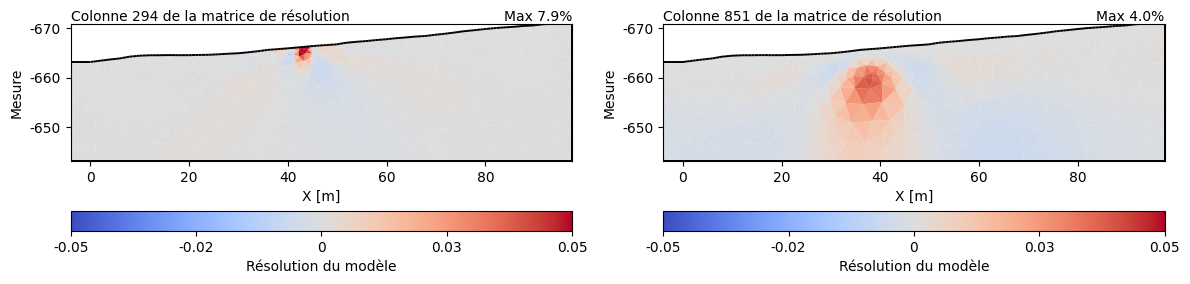

In [29]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

#ii = [150, 809]
ii = np.random.randint(0, RM.shape[0], 2)
for k, i in enumerate(ii):
    ax = axs[k]
    pg.show(mgr.paraDomain, RM[:, i], label='Résolution du modèle', cMin=-0.05, cMax=0.05, cMap='coolwarm', ax=ax) # cMin=0, cMax=.08, 
    ax.text(0, 1, f'Colonne {i} de la matrice de résolution',
            horizontalalignment='left',
            verticalalignment='bottom',
            transform=ax.transAxes)
    ax.text(1, 1, f'Max {np.max(RM[:, i])*100:.1f}%',
        horizontalalignment='right',
        verticalalignment='bottom',
        transform=ax.transAxes)
    ax.set_xlabel('X [m]')
    ax.set_ylabel('Mesure')
plt.tight_layout()
fig.savefig(f'figures/elec_resolution_modele_{method}')

n = int(np.sqrt(len(RD)))
m = len(RD)//n
d = RD[200].reshape(n, m)

In [ ]:
#pixel_plot = plt.imshow(d, cmap='Greens', interpolation='nearest', origin='lower') 

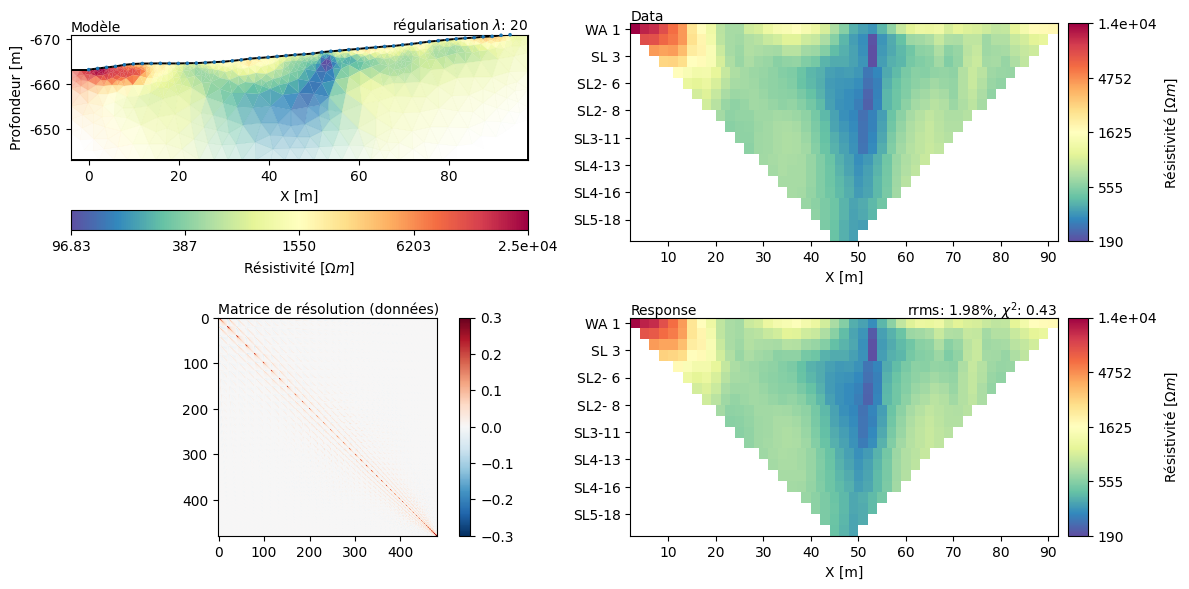

In [30]:
fig, axs = plt.subplots(2, 2, figsize=(12, 6))
mgr.showResultAndFit(axs=(axs[(0, 0)], axs[(0, 1)], axs[(1, 1)]), label=r'Résistivité [$ \Omega m$]', cMap='Spectral_r')

ax = axs[(0, 0)]
ax.set_ylabel('Profondeur [m]')
ax.set_xlabel('X [m]')
ax.text(0, 1, 'Modèle',
        horizontalalignment='left',
        verticalalignment='bottom',
        transform=ax.transAxes)
ax.text(1, 1, 'régularisation $\lambda$: 20',
        horizontalalignment='right',
        verticalalignment='bottom',
        transform=ax.transAxes)
im = axs[(1, 0)].imshow(RD, vmin=-.3, vmax=.3, cmap="RdBu_r") #  vmin=-0.3, vmax=0.3
cb = plt.colorbar(im)
ax = axs[(1, 0)]
ax.text(0, 1, 'Matrice de résolution (données)',
        horizontalalignment='left',
        verticalalignment='bottom',
        transform=ax.transAxes)
ax = axs[(0, 1)]
ax.set_xlabel('X [m]')
ax = axs[(1, 1)]
ax.set_xlabel('X [m]')
plt.tight_layout()

fig.savefig(f'figures/elec_inversion_{method}')

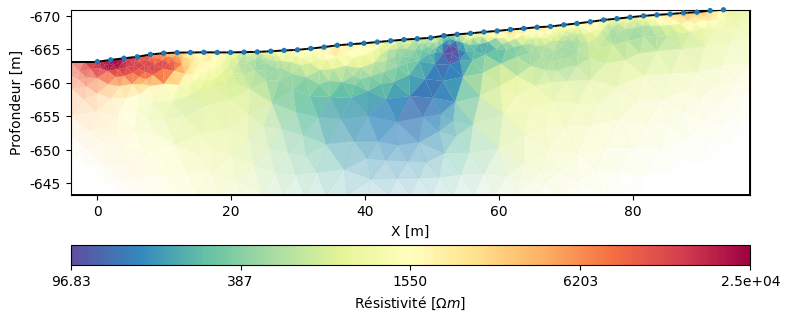

In [31]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
mgr.showResult(mod, cMap="Spectral_r", logScale=True, ax=ax, label=r'Résistivité [$ \Omega m$]') # cMin=130, cMax=23000, 
ax.set_ylabel('Profondeur [m]')
ax.set_xlabel('X [m]')
fig.savefig(f'figures/elec_model_{method}')

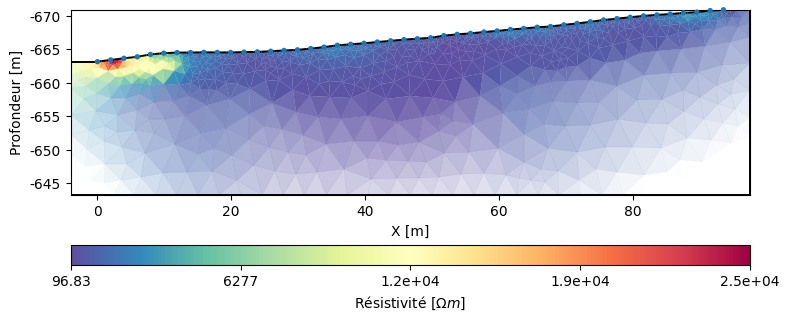

In [32]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
mgr.showResult(mod, cMap="Spectral_r", logScale=False, ax=ax, label=r'Résistivité [$ \Omega m$]') # cMin=130, cMax=23000, 
ax.set_ylabel('Profondeur [m]')
ax.set_xlabel('X [m]')
fig.savefig(f'figures/elec_model_nolog_{method}')

08/12/24 - 22:46:22 - pyGIMLi - INFO - Saving inversion results to: output/WS/ERTManager


Path output/WS/ERTManager already exists. Skipping
Additional (topo) points are unhandled and will not be saved.


('output/WS/ERTManager',
 <Figure size 1600x1000 with 2 Axes>,
 <Axes: xlabel='$x$ in m', ylabel='Depth in m'>)

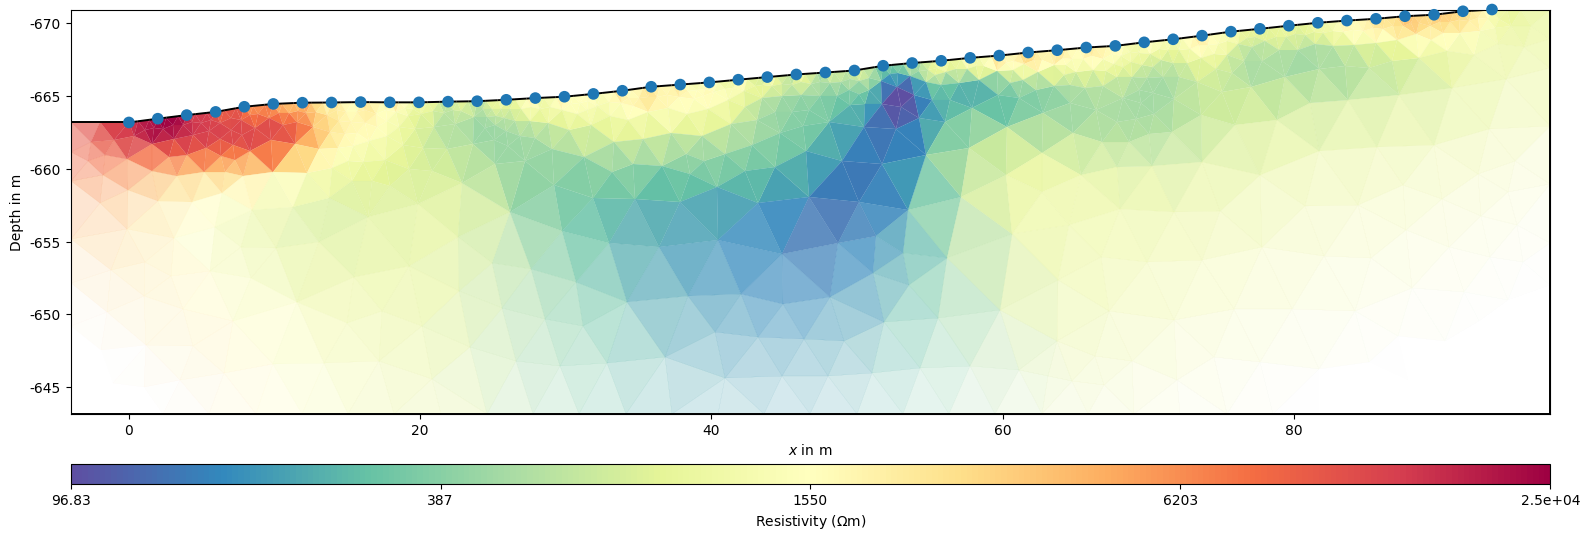

In [33]:
mgr.saveResult(f'output/{method}')

In [34]:
xzs = []
x_anomaly = np.array([30, 50, 55, 35, 30])
y_anomaly = np.array([655, 665, 660, 648, 655])
xz = np.array([x_anomaly, y_anomaly]).T
xzs.append(xz)

x_anomaly = np.array([-4, 11.5, 11, -4, -4])
y_anomaly = np.array([664, 665, 660, 659, 664])
xz = np.array([x_anomaly, y_anomaly]).T
xzs.append(xz)

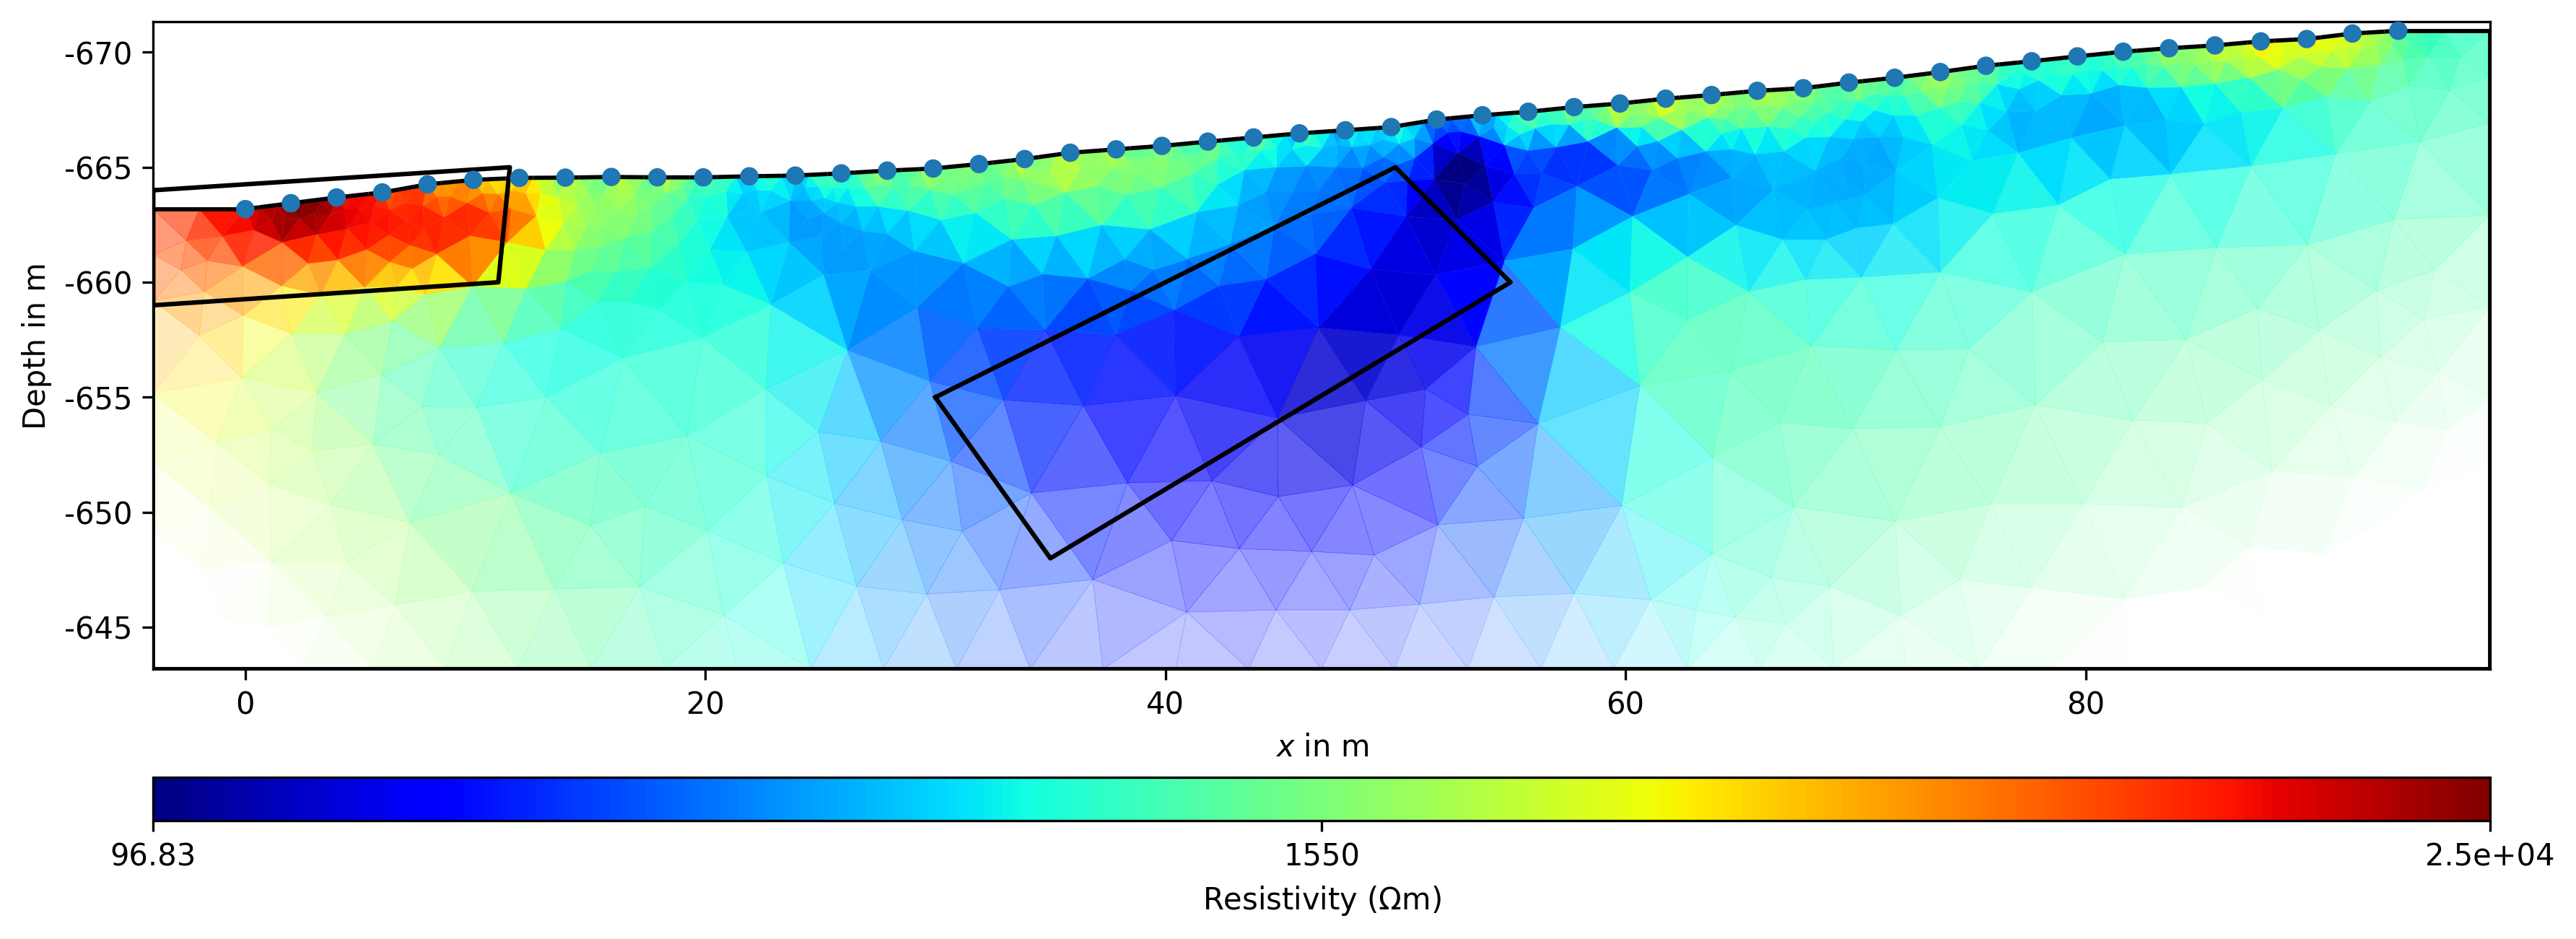

In [35]:
fig, ax = plt.subplots(figsize=(12, 8), dpi=300)
mgr.showResult(ax=ax, logScale=True, nLevs=3, cMap='jet')
for xz in xzs:
    ax.plot(xz[:, 0], xz[:, 1], "k-")

plt.show()

In [ ]:
data_test = data.copy()
plc = mt.createParaMeshPLC(data_test, paraDepth=100, boundary=0)
line = mt.createPolygon(xzs[0], marker=1, isClosed=True)
plc += line
line = mt.createPolygon(xzs[1], marker=2, isClosed=True)
plc += line
mesh2 = mt.createMesh(plc, quality=34.3)
pg.show(mesh2, markers=True, showMesh=True)

In [ ]:
# Inversion
mgr_test = ert.Manager()
mgr_test.setMesh(mesh2)
mgr_test.invert(data_test, secNodes=3, paraMaxCellSize=50.,
           zWeight=0.7,
           verbose=True, res=[[1, 100.0], [2, 1500]],
           lam=750, lambdaFactor = 0.75, dPhi = 2)  #lam représente la régularisation model=mod,

# Вычисление абсолютного значения корня средней квадратичной ошибки
abs_rms = mgr.inv.absrms()
abs_rms = abs_rms * 1000

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8), dpi=300)
mgr_test.showResult(ax=ax, logScale=True, nLevs=3, cMap='jet')
ax.scatter(data.sensors()[:, 0], data.sensors()[:, 1], s=3, c='r')
#ax.set_ylim([110, 165])
ax.set_xlabel("Х, м")
ax.set_ylabel("Абс. высота, м")
ax.set_title("Inversion Result with chosen anomalies")

plt.show()